In [1]:
# copyright 2022 Christian Forssén
# by Christian Forssén
# For detailed reasoning, see Data Analysis: A Bayesian Tutorial (2E) by D. S. Sivia with J. Skilling (ISBN 978-0-19-856832-2).

import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=999)         # for reproducibility
pHtrue=0.6                       # biased coin
flips=rng.random(2**12) # simulates 4096 coin flips
heads=flips<pHtrue              # boolean array, heads[i]=True if flip i is heads

In [2]:
# copyright 2022 Christian Forssén
# by Christian Forssén
# For detailed reasoning, see Data Analysis: A Bayesian Tutorial (2E) by D. S. Sivia with J. Skilling (ISBN 978-0-19-856832-2).

def prior(pH):
    "returns an array of prior probability densities"
    p=np.zeros_like(pH)
    p[(0<=pH)&(pH<=1)]=1      # allowed range: 0<=pH<=1
    return p                # uniform prior
def likelihood(pH,data):
    "returns an array of likelihood probability densities"
    N = len(data)
    no_of_heads = sum(data)
    no_of_tails = N - no_of_heads
    return pH**no_of_heads * (1-pH)**no_of_tails
def posterior(pH,data):
    "returns an array of (normalized) posterior probability densities"
    p=prior(pH)*likelihood(pH,data)
    norm=np.trapz(p,pH)
    return p/norm

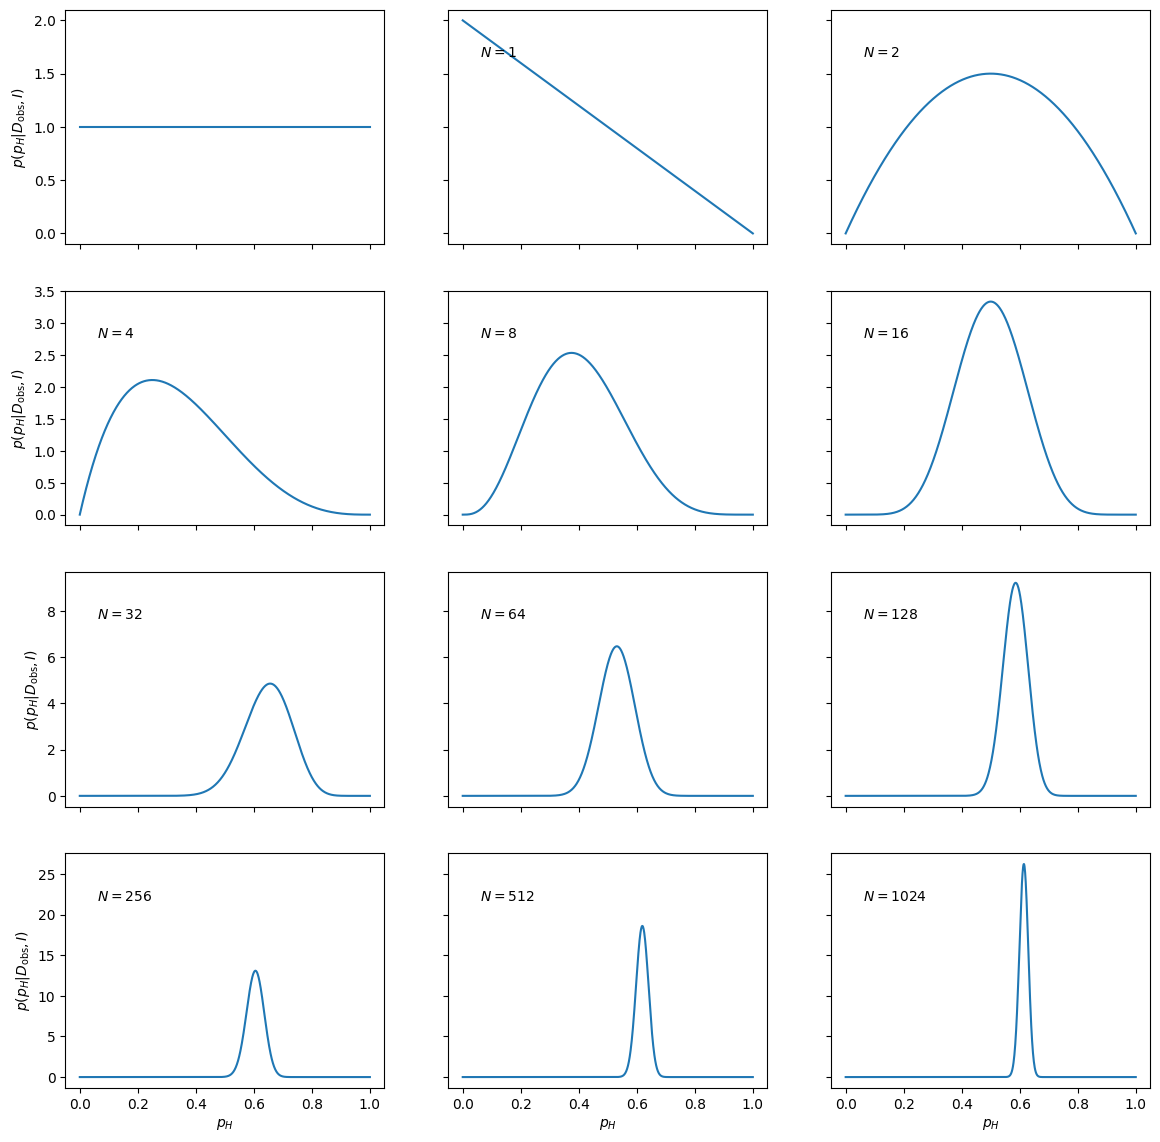

In [3]:
# copyright 2022 Christian Forssén
# by Christian Forssén
# For detailed reasoning, see Data Analysis: A Bayesian Tutorial (2E) by D. S. Sivia with J. Skilling (ISBN 978-0-19-856832-2).

pH=np.linspace(0,1,1000)
fig, axs = plt.subplots(nrows=4,ncols=3,sharex=True,sharey='row',figsize=(14,14))
axs_vec=np.reshape(axs,-1)
axs_vec[0].plot(pH,prior(pH))
for ndouble in range(11):
    ax=axs_vec[1+ndouble]
    ax.plot(pH,posterior(pH,heads[:2**ndouble]))
    ax.text(0.1, 0.8, '$N={0}$'.format(2**ndouble), transform=ax.transAxes)
for row in range(4): axs[row,0].set_ylabel('$p(p_H|D_\mathrm{obs},I)$')
for col in range(3): axs[-1,col].set_xlabel('$p_H$')